In [1]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import bokeh
import altair as alt
import ggplot as gg
import folium

# Load the dataset
df = pd.read_csv('/kaggle/input/video-game-ratings-and-reviews-dataset/all_games.csv')


In [2]:
# Display dataset structure and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18800 entries, 0 to 18799
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   index         18800 non-null  int64 
 1   name          18800 non-null  object
 2   platform      18800 non-null  object
 3   release_date  18800 non-null  object
 4   summary       18686 non-null  object
 5   meta_score    18800 non-null  int64 
 6   user_review   18800 non-null  object
dtypes: int64(2), object(5)
memory usage: 1.0+ MB


In [3]:
# Count unique platforms and display them
unique_platforms = df['platform'].unique()
num_platforms = len(unique_platforms)
print(f"Number of unique platforms: {num_platforms}")
print("Unique platforms:", unique_platforms)

Number of unique platforms: 22
Unique platforms: [' Nintendo 64' ' PlayStation' ' PlayStation 3' ' Dreamcast' ' Xbox 360'
 ' Wii' ' Xbox One' ' PC' ' Switch' ' PlayStation 2' ' PlayStation 4'
 ' GameCube' ' Xbox' ' Wii U' ' Game Boy Advance' ' 3DS' ' Xbox Series X'
 ' DS' ' PlayStation Vita' ' PlayStation 5' ' PSP' ' Stadia']


**Can you provide a summary of the distribution of meta scores in the dataset?**

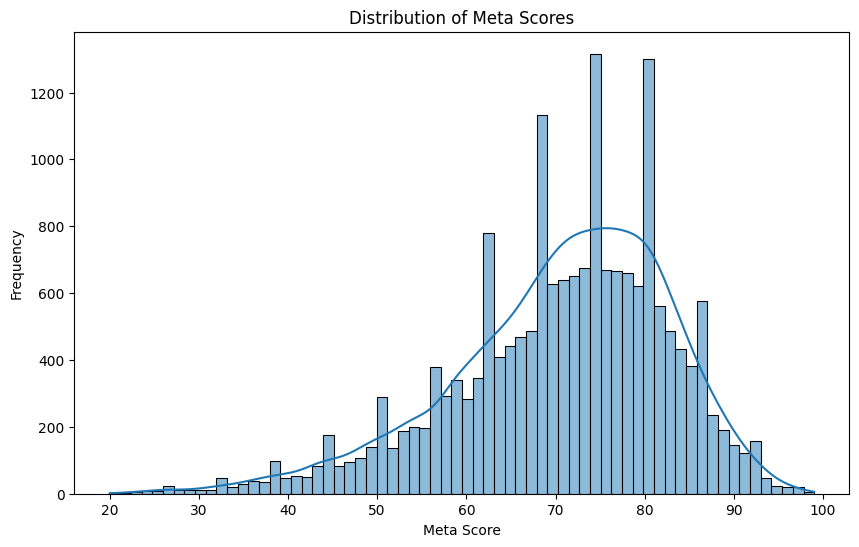

In [4]:
# Generate a summary of meta scores distribution
fig, ax = plt.subplots(figsize=(10, 6))
sns.histplot(df['meta_score'], kde=True, ax=ax)
ax.set_title('Distribution of Meta Scores')
ax.set_xlabel('Meta Score')
ax.set_ylabel('Frequency')
plt.show()


**What is the average user review score for each platform?**

In [5]:
# Replace 'tbd' with NaN in the 'user_review' column
df['user_review'] = pd.to_numeric(df['user_review'], errors='coerce')

# Calculate average user review score for each platform
avg_user_review_by_platform = df.groupby('platform')['user_review'].mean().sort_values(ascending=False)
print("Average User Review Score by Platform:")
print(avg_user_review_by_platform)


Average User Review Score by Platform:
platform
 Nintendo 64         7.954930
 Dreamcast           7.870588
 PlayStation         7.722289
 PlayStation 2       7.532494
 Game Boy Advance    7.467049
 GameCube            7.430751
 Stadia              7.380000
 Wii U               7.312155
 PSP                 7.267888
 PlayStation Vita    7.267729
 Switch              7.171053
 Xbox                7.156997
 DS                  7.126878
 3DS                 7.103968
 Wii                 7.091625
 PlayStation 3       6.924669
 PC                  6.918197
 Xbox 360            6.915643
 PlayStation 5       6.665455
 Xbox Series X       6.658462
 PlayStation 4       6.492256
 Xbox One            6.473186
Name: user_review, dtype: float64


**How does the distribution of meta scores vary across different platforms?**

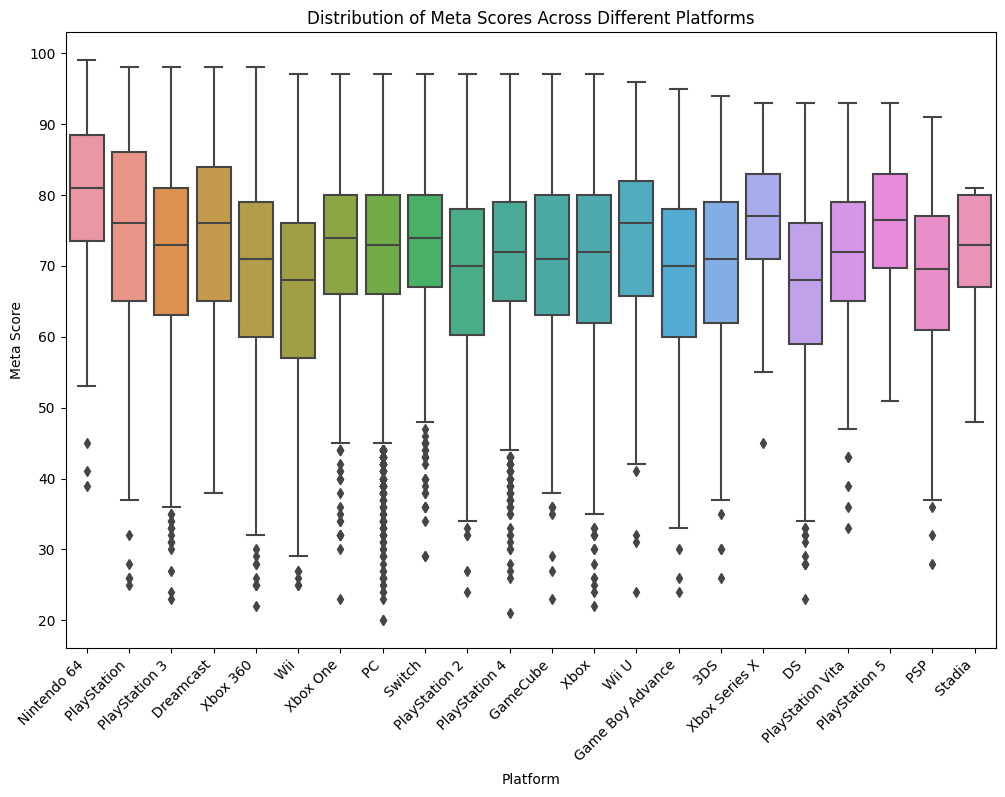

In [6]:
# Create a boxplot to visualize the distribution of meta scores by platform
fig, ax = plt.subplots(figsize=(12, 8))
sns.boxplot(x='platform', y='meta_score', data=df, ax=ax)
ax.set_title('Distribution of Meta Scores Across Different Platforms')
ax.set_xlabel('Platform')
ax.set_ylabel('Meta Score')
plt.xticks(rotation=45, ha='right')
plt.show()


**Is there any correlation between meta scores and user reviews?**

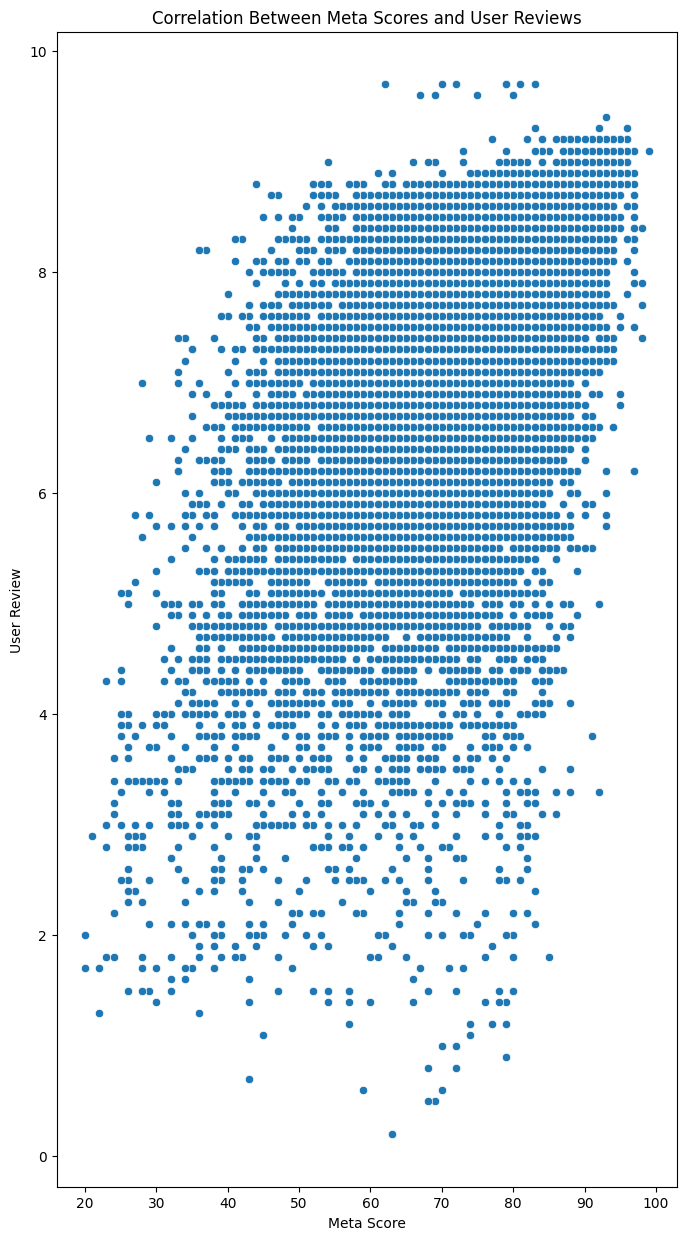

In [7]:
# Calculate and visualize the correlation between meta scores and user reviews
fig, ax = plt.subplots(figsize=(8, 15))
sns.scatterplot(x='meta_score', y='user_review', data=df, ax=ax)
ax.set_title('Correlation Between Meta Scores and User Reviews')
ax.set_xlabel('Meta Score')
ax.set_ylabel('User Review')
plt.show()


**What is the trend in the number of video game releases over the years?**

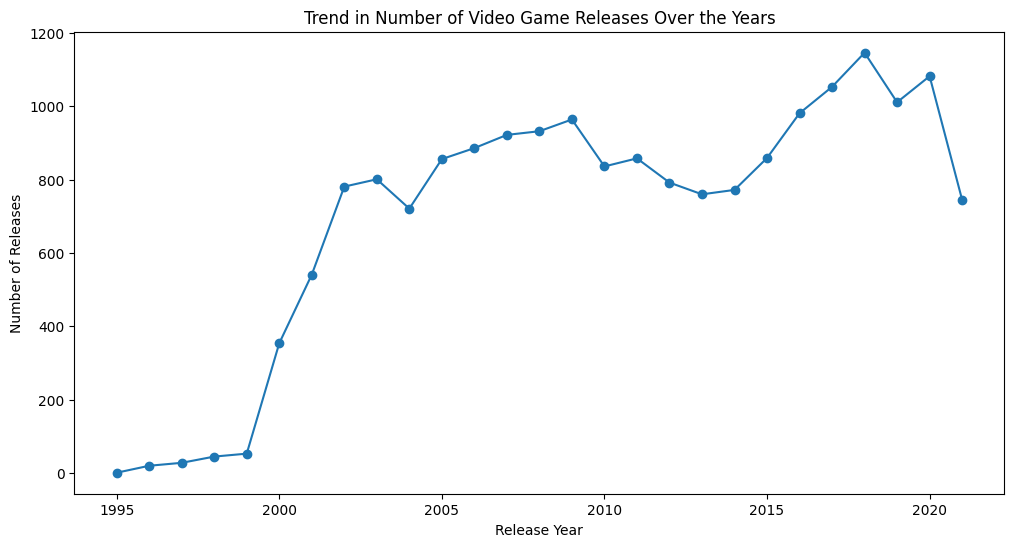

In [8]:
# Convert release_date to datetime and extract the year
df['release_year'] = pd.to_datetime(df['release_date']).dt.year

# Plotting the trend in the number of video game releases over the years
fig, ax = plt.subplots(figsize=(12, 6))
df.groupby('release_year')['index'].count().plot(kind='line', marker='o', ax=ax)
ax.set_title('Trend in Number of Video Game Releases Over the Years')
ax.set_xlabel('Release Year')
ax.set_ylabel('Number of Releases')
plt.show()


**Can you visualize the distribution of meta scores using a violin plot?**

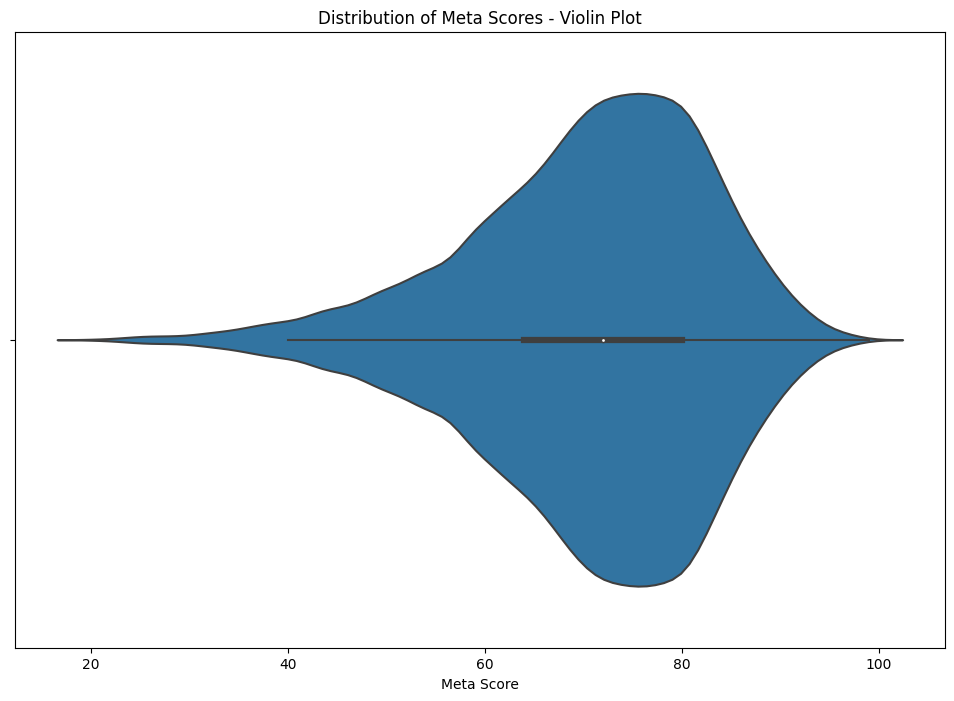

In [9]:
# Creating a violin plot for the distribution of meta scores
fig, ax = plt.subplots(figsize=(12, 8))
sns.violinplot(x='meta_score', data=df, ax=ax)
ax.set_title('Distribution of Meta Scores - Violin Plot')
ax.set_xlabel('Meta Score')
plt.show()


**What are the top 10 video games based on the highest meta scores?**

In [10]:
# Displaying the top 10 video games based on the highest meta scores
top_meta_scores = df.sort_values(by='meta_score', ascending=False).head(10)
print("Top 10 Video Games by Meta Scores:")
print(top_meta_scores[['name', 'meta_score']])


Top 10 Video Games by Meta Scores:
                                                 name  meta_score
0                The Legend of Zelda: Ocarina of Time          99
2                                 Grand Theft Auto IV          98
3                                         SoulCalibur          98
4                                 Grand Theft Auto IV          98
1                            Tony Hawk's Pro Skater 2          98
14                           Tony Hawk's Pro Skater 3          97
23                                            NFL 2K1          97
22  The House in Fata Morgana - Dreams of the Reve...          97
21                               Halo: Combat Evolved          97
20                                Super Mario Odyssey          97


**Can you create an interactive scatter plot using Plotly to explore the relationship between user reviews and meta scores?**

In [11]:
# Creating an interactive scatter plot using Plotly
fig = px.scatter(df, x='meta_score', y='user_review', hover_data=['name'], title='Interactive Scatter Plot: Meta Scores vs User Reviews')
fig.update_layout(xaxis_title='Meta Score', yaxis_title='User Review')
fig.show()


**Can you visualize the relationship between meta scores, user reviews, and release years using a 3D scatter plot?**

In [12]:
# Creating a 3D scatter plot using Plotly to explore the relationship between meta scores, user reviews, and release years
fig = px.scatter_3d(df, x='meta_score', y='user_review', z='release_year', color='platform',
                    hover_data=['name'], title='3D Scatter Plot: Meta Scores, User Reviews, and Release Years')
fig.update_layout(scene=dict(xaxis_title='Meta Score', yaxis_title='User Review', zaxis_title='Release Year'))
fig.show()


**Can you generate a heatmap to explore the correlation matrix between meta scores and user reviews?**

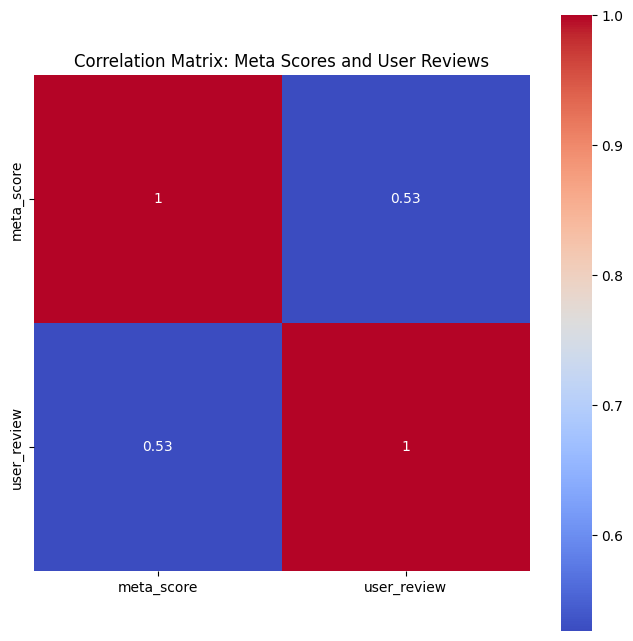

In [13]:
# Replace 'tbd' with NaN and convert the 'user_review' column to numeric
df['user_review'] = pd.to_numeric(df['user_review'], errors='coerce')

# Creating a heatmap to explore the correlation matrix between meta scores and user reviews
correlation_matrix = df[['meta_score', 'user_review']].corr()

# Plot the heatmap
fig, ax = plt.subplots(figsize=(8, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', square=True, ax=ax)
ax.set_title('Correlation Matrix: Meta Scores and User Reviews')
plt.show()


**How has the average meta score changed over the years?**

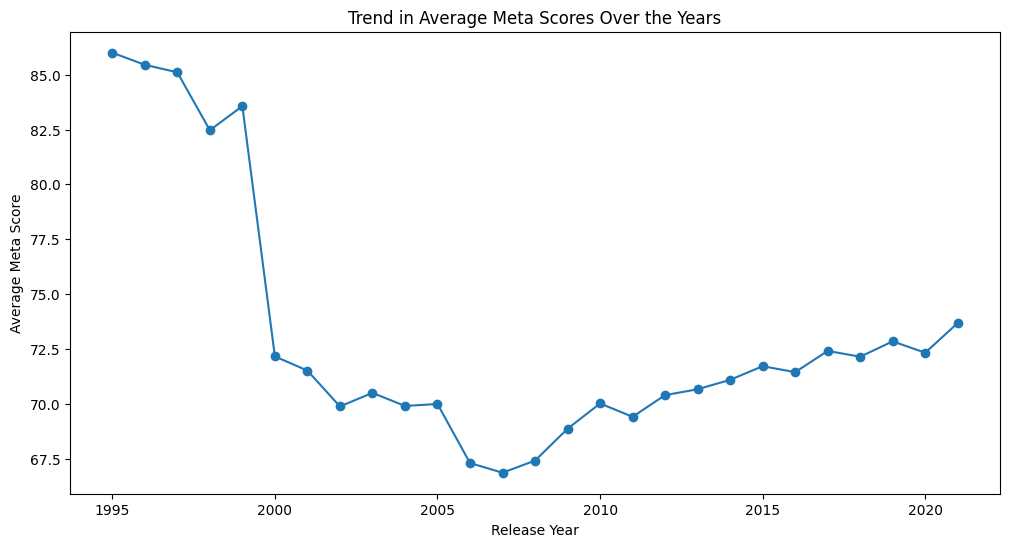

In [14]:
# Plotting the trend in the average meta score over the years
fig, ax = plt.subplots(figsize=(12, 6))
df.groupby('release_year')['meta_score'].mean().plot(kind='line', marker='o', ax=ax)
ax.set_title('Trend in Average Meta Scores Over the Years')
ax.set_xlabel('Release Year')
ax.set_ylabel('Average Meta Score')
plt.show()


**What are the top 10 platforms with the highest average meta scores?**

In [15]:
# Calculate average meta scores for each platform and display the top 10
avg_meta_scores_by_platform = df.groupby('platform')['meta_score'].mean().sort_values(ascending=False).head(10)
print("Top 10 Platforms with Highest Average Meta Scores:")
print(avg_meta_scores_by_platform)


Top 10 Platforms with Highest Average Meta Scores:
platform
 Nintendo 64         78.436620
 Xbox Series X       75.987013
 PlayStation 5       75.427419
 Dreamcast           74.072000
 PlayStation         73.342246
 Switch              72.523231
 Wii U               72.423913
 Xbox One            72.395250
 PC                  71.797903
 PlayStation Vita    71.062257
Name: meta_score, dtype: float64


**Can you create a bar chart to show the average meta scores for the top 10 platforms?**

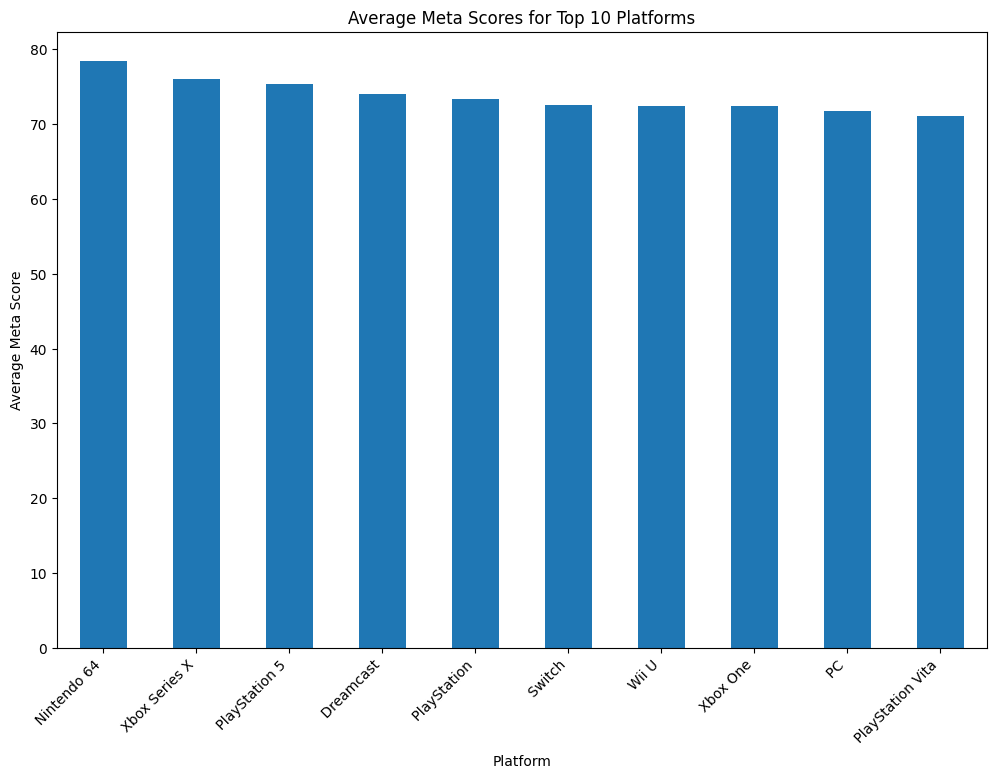

In [16]:
# Create a bar chart for average meta scores of the top 10 platforms
fig, ax = plt.subplots(figsize=(12, 8))
avg_meta_scores_by_platform.plot(kind='bar', ax=ax)
ax.set_title('Average Meta Scores for Top 10 Platforms')
ax.set_xlabel('Platform')
ax.set_ylabel('Average Meta Score')
plt.xticks(rotation=45, ha='right')
plt.show()


**Can you visualize the release dates of games using a time-based line chart?**

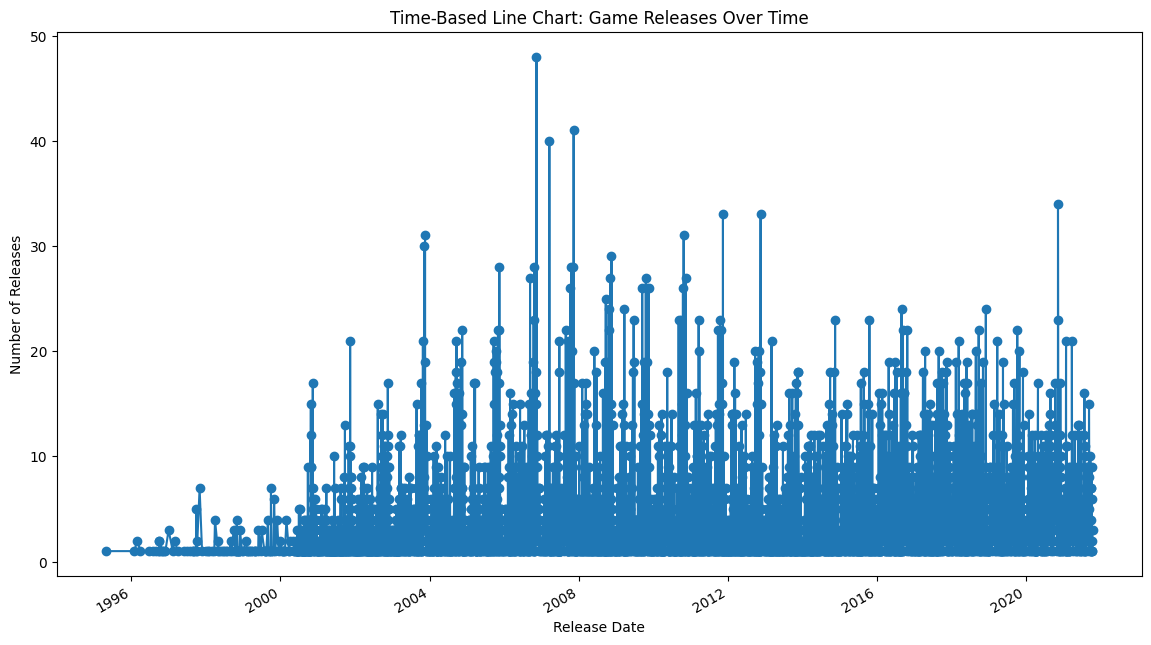

In [17]:
# Convert release_date to datetime
df['release_date'] = pd.to_datetime(df['release_date'])

# Plotting a time-based line chart for game releases
fig, ax = plt.subplots(figsize=(14, 8))
df.groupby('release_date')['index'].count().plot(kind='line', marker='o', ax=ax)
ax.set_title('Time-Based Line Chart: Game Releases Over Time')
ax.set_xlabel('Release Date')
ax.set_ylabel('Number of Releases')
plt.show()


**Can you generate a pair plot to explore relationships between meta scores, user reviews, and release dates?**

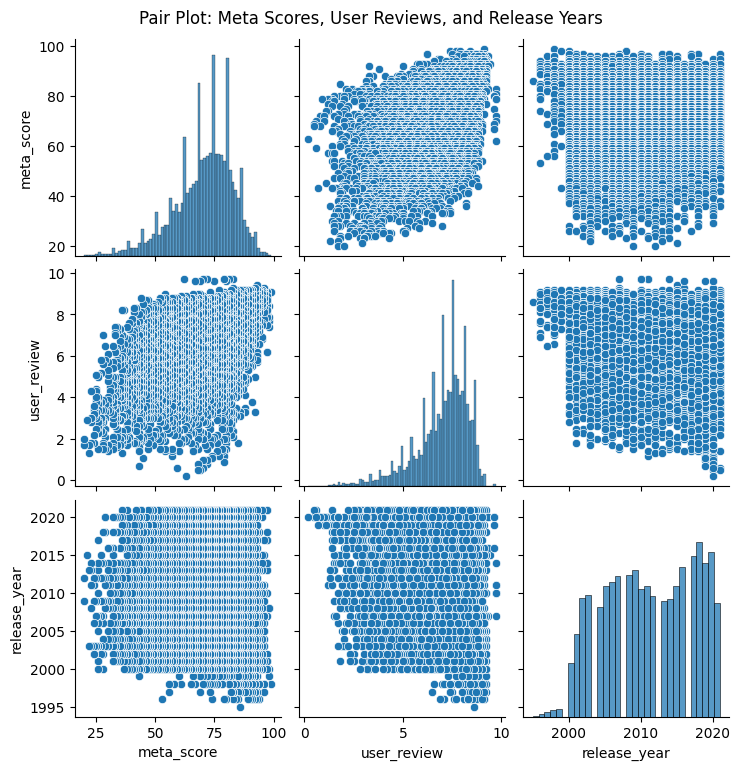

In [18]:
# Create a pair plot to visualize relationships between meta scores, user reviews, and release years
sns.pairplot(df[['meta_score', 'user_review', 'release_year']])
plt.suptitle('Pair Plot: Meta Scores, User Reviews, and Release Years', y=1.02)
plt.show()


**How many games were released on each platform? Visualize it using a bar chart.**

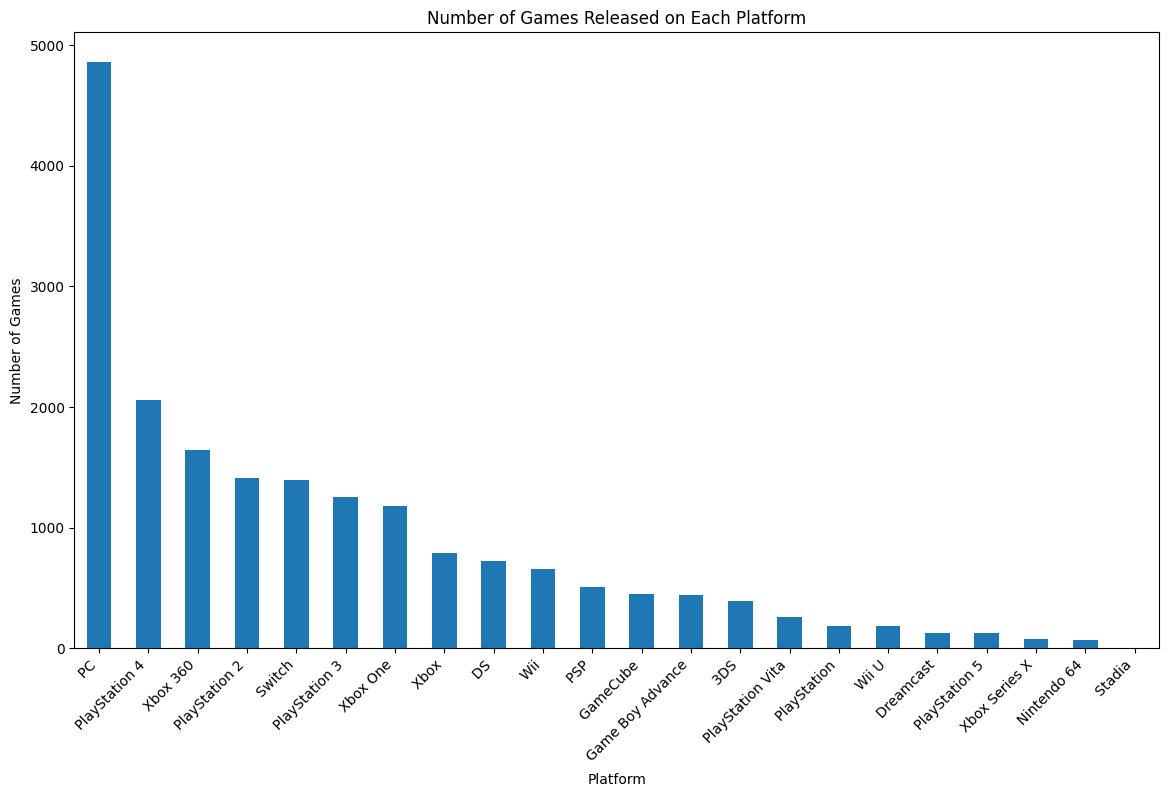

In [19]:
# Count the number of games released on each platform and create a bar chart
fig, ax = plt.subplots(figsize=(14, 8))
df['platform'].value_counts().sort_values(ascending=False).plot(kind='bar', ax=ax)
ax.set_title('Number of Games Released on Each Platform')
ax.set_xlabel('Platform')
ax.set_ylabel('Number of Games')
plt.xticks(rotation=45, ha='right')
plt.show()


**Explore the relationship between meta scores and user reviews using an interactive scatter plot**

In [20]:
# Create an interactive scatter plot using Plotly for meta scores and user reviews
fig = px.scatter(df, x='meta_score', y='user_review', color='platform', hover_data=['name'],
                 title='Interactive Scatter Plot: Meta Scores vs User Reviews')
fig.update_layout(xaxis_title='Meta Score', yaxis_title='User Review')
fig.show()
